In [1]:
!nvidia-smi --query-gpu=name --format=csv,noheader | head -n 1

NVIDIA GeForce RTX 3090


In [ ]:
# !pip install git+https://github.com/karnwatcharasupat/spauq.git@main

In [2]:
import io
import time
import torch
import numpy as np
import PIL
from torchvision.transforms import ToPILImage, PILToTensor
from datasets import load_dataset, Image
from walloc import walloc
from diffusers.models.autoencoders import AutoencoderOobleck
# from spauq.core.metrics import spauq_eval
import cdpam
class Config: pass

In [ ]:
from diffusers import StableAudioPipeline

pipe = StableAudioPipeline.from_pretrained("stabilityai/stable-audio-open-1.0", torch_dtype=torch.float16)
pipe = pipe.to("cuda")

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


model_index.json:   0%|          | 0.00/498 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

projection_model/config.json:   0%|          | 0.00/181 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/411 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/1.50k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/4.85G [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/439M [00:00<?, ?B/s]

tokenizer/tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

transformer/config.json:   0%|          | 0.00/391 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/20.8k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.59M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/4.23G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/624M [00:00<?, ?B/s]

Error while downloading from https://cdn-lfs-us-1.huggingface.co/repos/77/17/77175fffdd72cac2e339ce7cd2893d797a91d90e00ab3b60d28daa37f994cfb4/7b20458a071231aaf32613b6fbc7945f28f34dbba4f295bb49bad56f5f66b57e?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27model.safetensors%3B+filename%3D%22model.safetensors%22%3B&Expires=1727316589&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcyNzMxNjU4OX19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy11cy0xLmh1Z2dpbmdmYWNlLmNvL3JlcG9zLzc3LzE3Lzc3MTc1ZmZmZGQ3MmNhYzJlMzM5Y2U3Y2QyODkzZDc5N2E5MWQ5MGUwMGFiM2I2MGQyOGRhYTM3Zjk5NGNmYjQvN2IyMDQ1OGEwNzEyMzFhYWYzMjYxM2I2ZmJjNzk0NWYyOGYzNGRiYmE0ZjI5NWJiNDliYWQ1NmY1ZjY2YjU3ZT9yZXNwb25zZS1jb250ZW50LWRpc3Bvc2l0aW9uPSoifV19&Signature=mE33q3UZF-79QEFRIXeX1JNsz8nYHQUVw5mOeR7AteMDnBgH2-zwE0zfCeQZ88MjC7pIN3dE-FN3ak5j5HG1XxnqinyF3KuOY8YltN1XA7ROuS8LoVcVg5XGvgtr1HZMMOFCeC61oHAKV-1neGGK5lQgTHkQ%7ER7U1hshYmEfYO65atmX%7ERo20oOYKrVSIHQp3A46ZIkz5YiMVvdt5I-3zhOnKH41VwU0w0O3yLkMs-K

diffusion_pytorch_model.safetensors:  36%|###5      | 1.52G/4.23G [00:00<?, ?B/s]

model.safetensors:  79%|#######8  | 346M/439M [00:00<?, ?B/s]

model.safetensors:  73%|#######3  | 3.57G/4.85G [00:00<?, ?B/s]

Error while downloading from https://cdn-lfs-us-1.huggingface.co/repos/77/17/77175fffdd72cac2e339ce7cd2893d797a91d90e00ab3b60d28daa37f994cfb4/65ae9715febfeb2dc9f33aa506c2bda69fd2ddf8ebc483fb2df090df4ca506fd?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27diffusion_pytorch_model.safetensors%3B+filename%3D%22diffusion_pytorch_model.safetensors%22%3B&Expires=1727316589&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcyNzMxNjU4OX19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy11cy0xLmh1Z2dpbmdmYWNlLmNvL3JlcG9zLzc3LzE3Lzc3MTc1ZmZmZGQ3MmNhYzJlMzM5Y2U3Y2QyODkzZDc5N2E5MWQ5MGUwMGFiM2I2MGQyOGRhYTM3Zjk5NGNmYjQvNjVhZTk3MTVmZWJmZWIyZGM5ZjMzYWE1MDZjMmJkYTY5ZmQyZGRmOGViYzQ4M2ZiMmRmMDkwZGY0Y2E1MDZmZD9yZXNwb25zZS1jb250ZW50LWRpc3Bvc2l0aW9uPSoifV19&Signature=SOC65qZ87PprJfJttLdgiuUX%7ECyBVVMb%7EsOFz7T1ElI7Tl7HonPYV2KM2i56sUyz9SmId2IUC8eE0bOQxa-616Rxj-8pulCTKA6XUB30JhuyeehDF3G9yVmXv%7E4LAjXz8ZIEks3fLXAuT58ejb-P7BlXvOySBDFGobOJN6GWqyW28uG75sz4DyxW31%7EFJ3zTgE%

diffusion_pytorch_model.safetensors:  36%|###5      | 1.52G/4.23G [00:00<?, ?B/s]

model.safetensors:  79%|#######8  | 346M/439M [00:00<?, ?B/s]

model.safetensors:  73%|#######3  | 3.57G/4.85G [00:00<?, ?B/s]

Error while downloading from https://cdn-lfs-us-1.huggingface.co/repos/77/17/77175fffdd72cac2e339ce7cd2893d797a91d90e00ab3b60d28daa37f994cfb4/7b20458a071231aaf32613b6fbc7945f28f34dbba4f295bb49bad56f5f66b57e?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27model.safetensors%3B+filename%3D%22model.safetensors%22%3B&Expires=1727316589&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcyNzMxNjU4OX19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy11cy0xLmh1Z2dpbmdmYWNlLmNvL3JlcG9zLzc3LzE3Lzc3MTc1ZmZmZGQ3MmNhYzJlMzM5Y2U3Y2QyODkzZDc5N2E5MWQ5MGUwMGFiM2I2MGQyOGRhYTM3Zjk5NGNmYjQvN2IyMDQ1OGEwNzEyMzFhYWYzMjYxM2I2ZmJjNzk0NWYyOGYzNGRiYmE0ZjI5NWJiNDliYWQ1NmY1ZjY2YjU3ZT9yZXNwb25zZS1jb250ZW50LWRpc3Bvc2l0aW9uPSoifV19&Signature=mE33q3UZF-79QEFRIXeX1JNsz8nYHQUVw5mOeR7AteMDnBgH2-zwE0zfCeQZ88MjC7pIN3dE-FN3ak5j5HG1XxnqinyF3KuOY8YltN1XA7ROuS8LoVcVg5XGvgtr1HZMMOFCeC61oHAKV-1neGGK5lQgTHkQ%7ER7U1hshYmEfYO65atmX%7ERo20oOYKrVSIHQp3A46ZIkz5YiMVvdt5I-3zhOnKH41VwU0w0O3yLkMs-K

model.safetensors:  79%|#######8  | 346M/439M [00:00<?, ?B/s]

model.safetensors:  73%|#######3  | 3.57G/4.85G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:  36%|###5      | 1.52G/4.23G [00:00<?, ?B/s]

Error while downloading from https://cdn-lfs-us-1.huggingface.co/repos/77/17/77175fffdd72cac2e339ce7cd2893d797a91d90e00ab3b60d28daa37f994cfb4/7b20458a071231aaf32613b6fbc7945f28f34dbba4f295bb49bad56f5f66b57e?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27model.safetensors%3B+filename%3D%22model.safetensors%22%3B&Expires=1727316589&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcyNzMxNjU4OX19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy11cy0xLmh1Z2dpbmdmYWNlLmNvL3JlcG9zLzc3LzE3Lzc3MTc1ZmZmZGQ3MmNhYzJlMzM5Y2U3Y2QyODkzZDc5N2E5MWQ5MGUwMGFiM2I2MGQyOGRhYTM3Zjk5NGNmYjQvN2IyMDQ1OGEwNzEyMzFhYWYzMjYxM2I2ZmJjNzk0NWYyOGYzNGRiYmE0ZjI5NWJiNDliYWQ1NmY1ZjY2YjU3ZT9yZXNwb25zZS1jb250ZW50LWRpc3Bvc2l0aW9uPSoifV19&Signature=mE33q3UZF-79QEFRIXeX1JNsz8nYHQUVw5mOeR7AteMDnBgH2-zwE0zfCeQZ88MjC7pIN3dE-FN3ak5j5HG1XxnqinyF3KuOY8YltN1XA7ROuS8LoVcVg5XGvgtr1HZMMOFCeC61oHAKV-1neGGK5lQgTHkQ%7ER7U1hshYmEfYO65atmX%7ERo20oOYKrVSIHQp3A46ZIkz5YiMVvdt5I-3zhOnKH41VwU0w0O3yLkMs-K

diffusion_pytorch_model.safetensors:  38%|###8      | 1.61G/4.23G [00:00<?, ?B/s]

model.safetensors:  77%|#######6  | 3.72G/4.85G [00:00<?, ?B/s]

Error while downloading from https://cdn-lfs-us-1.huggingface.co/repos/77/17/77175fffdd72cac2e339ce7cd2893d797a91d90e00ab3b60d28daa37f994cfb4/7b20458a071231aaf32613b6fbc7945f28f34dbba4f295bb49bad56f5f66b57e?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27model.safetensors%3B+filename%3D%22model.safetensors%22%3B&Expires=1727316589&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcyNzMxNjU4OX19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy11cy0xLmh1Z2dpbmdmYWNlLmNvL3JlcG9zLzc3LzE3Lzc3MTc1ZmZmZGQ3MmNhYzJlMzM5Y2U3Y2QyODkzZDc5N2E5MWQ5MGUwMGFiM2I2MGQyOGRhYTM3Zjk5NGNmYjQvN2IyMDQ1OGEwNzEyMzFhYWYzMjYxM2I2ZmJjNzk0NWYyOGYzNGRiYmE0ZjI5NWJiNDliYWQ1NmY1ZjY2YjU3ZT9yZXNwb25zZS1jb250ZW50LWRpc3Bvc2l0aW9uPSoifV19&Signature=mE33q3UZF-79QEFRIXeX1JNsz8nYHQUVw5mOeR7AteMDnBgH2-zwE0zfCeQZ88MjC7pIN3dE-FN3ak5j5HG1XxnqinyF3KuOY8YltN1XA7ROuS8LoVcVg5XGvgtr1HZMMOFCeC61oHAKV-1neGGK5lQgTHkQ%7ER7U1hshYmEfYO65atmX%7ERo20oOYKrVSIHQp3A46ZIkz5YiMVvdt5I-3zhOnKH41VwU0w0O3yLkMs-K

diffusion_pytorch_model.safetensors:  41%|####      | 1.73G/4.23G [00:00<?, ?B/s]

model.safetensors:  79%|#######8  | 3.82G/4.85G [00:00<?, ?B/s]

Error while downloading from https://cdn-lfs-us-1.huggingface.co/repos/77/17/77175fffdd72cac2e339ce7cd2893d797a91d90e00ab3b60d28daa37f994cfb4/7b20458a071231aaf32613b6fbc7945f28f34dbba4f295bb49bad56f5f66b57e?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27model.safetensors%3B+filename%3D%22model.safetensors%22%3B&Expires=1727316589&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcyNzMxNjU4OX19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy11cy0xLmh1Z2dpbmdmYWNlLmNvL3JlcG9zLzc3LzE3Lzc3MTc1ZmZmZGQ3MmNhYzJlMzM5Y2U3Y2QyODkzZDc5N2E5MWQ5MGUwMGFiM2I2MGQyOGRhYTM3Zjk5NGNmYjQvN2IyMDQ1OGEwNzEyMzFhYWYzMjYxM2I2ZmJjNzk0NWYyOGYzNGRiYmE0ZjI5NWJiNDliYWQ1NmY1ZjY2YjU3ZT9yZXNwb25zZS1jb250ZW50LWRpc3Bvc2l0aW9uPSoifV19&Signature=mE33q3UZF-79QEFRIXeX1JNsz8nYHQUVw5mOeR7AteMDnBgH2-zwE0zfCeQZ88MjC7pIN3dE-FN3ak5j5HG1XxnqinyF3KuOY8YltN1XA7ROuS8LoVcVg5XGvgtr1HZMMOFCeC61oHAKV-1neGGK5lQgTHkQ%7ER7U1hshYmEfYO65atmX%7ERo20oOYKrVSIHQp3A46ZIkz5YiMVvdt5I-3zhOnKH41VwU0w0O3yLkMs-K

In [3]:
codec = AutoencoderOobleck.from_pretrained("stabilityai/stable-audio-open-1.0", subfolder='vae')
codec.eval();

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


OSError: stabilityai/stable-audio-open-1.0 is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo with `token` or log in with `huggingface-cli login`.

In [5]:
lpips_loss = LPIPS().to("cuda")
dists_loss = DISTS().to("cuda")

/home/dgj335/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/dgj335/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [6]:
LSDIR = load_dataset("danjacobellis/LSDIR_val", split='validation')

In [7]:
def stable_diffusion_compress(sample):
    
    with torch.no_grad():
        img = sample['image']
        x = PILToTensor()(img).to(torch.float)
        x = (x/255 - 0.5).unsqueeze(0).to(device)
        H, W = x.size(2), x.size(3)
        x_padded = walloc.pad(x,p=8)
    
        t0 = time.time()
        Y = codec.encode(x).latent_dist.mode().to(torch.float16)
        encode_time = time.time() - t0
    
        t0 = time.time()
        x_hat = codec.decode(Y.to(torch.float)).sample
        x_hat = x_hat.clamp(-0.5,0.5)
        decode_time = time.time() - t0
        
        x_hat = walloc.crop(x_hat, (H,W))
        rec = ToPILImage()(x_hat[0] + 0.5)
        buff2 = io.BytesIO()
        rec.save(buff2, format='png', lossless=True)
        rec_png_bytes = buff2.getbuffer()
    
        bpp = 4.0
        PSNR = psnr(x+0.5,x_hat+0.5)
        MSSIM = multi_scale_ssim(x+0.5,x_hat+0.5)
        LPIPS_dB = -10*np.log10(lpips_loss(x.to("cuda")+0.5, x_hat.to("cuda")+0.5).item())
        DISTS_dB = -10*np.log10(dists_loss(x.to("cuda")+0.5, x_hat.to("cuda")+0.5).item())        
        
        return {
            'recovered': rec_png_bytes,
            'compressed': Y,
            'encode_time': encode_time,
            'decode_time': decode_time,
            'bpp': bpp,
            'PSNR': PSNR,
            'MSSIM': MSSIM,
            'LPIPS_dB': LPIPS_dB,
            'DISTS_dB': DISTS_dB,
        }

In [10]:
device = "cuda"
codec = codec.to(device)
gpu = LSDIR.map(stable_diffusion_compress)
gpu = gpu.cast_column('recovered',Image())

Map:   0%|          | 0/250 [00:00<?, ? examples/s]

In [11]:
def stable_diffusion_compress_cpu(sample):
    with torch.no_grad():
        img = sample['image']
        x = PILToTensor()(img).to(torch.float)
        x = (x/255 - 0.5).unsqueeze(0).to(device)
        H, W = x.size(2), x.size(3)
        x_padded = walloc.pad(x,p=8)
    
        t0 = time.time()
        Y = codec.encode(x).latent_dist.mode().to(torch.float16)
        encode_time = time.time() - t0
    
        t0 = time.time()
        x_hat = codec.decode(Y.to(torch.float)).sample
        x_hat = x_hat.clamp(-0.5,0.5)
        decode_time = time.time() - t0
                        
    return {
        'cpu_encode_time': encode_time,
        'cpu_decode_time': decode_time,
    }

In [12]:
device = "cpu"
codec = codec.to(device)
cpu = LSDIR.map(stable_diffusion_compress_cpu)
combined = gpu.add_column('cpu_encode_time',cpu['cpu_encode_time'])
combined = combined.add_column('cpu_decode_time',cpu['cpu_decode_time'])

Map:   0%|          | 0/250 [00:00<?, ? examples/s]

In [13]:
metrics = [
     'encode_time',
     'decode_time',
     'bpp',
     'PSNR',
     'MSSIM',
     'LPIPS_dB',
     'DISTS_dB', 
     'cpu_encode_time',
     'cpu_decode_time',
]

Oops, BPP should be 4.0 at FP16

In [15]:
for metric in metrics:
    μ = np.mean(combined[metric])
    print(f"{metric}: {μ}")

encode_time: 0.006820296287536621
decode_time: 0.013025806427001954
bpp: 1.0
PSNR: 20.880613334655763
MSSIM: 0.8399008561372757
LPIPS_dB: 8.325254677176737
DISTS_dB: 13.84664325610264
cpu_encode_time: 6.641024961471557
cpu_decode_time: 12.59720823287964


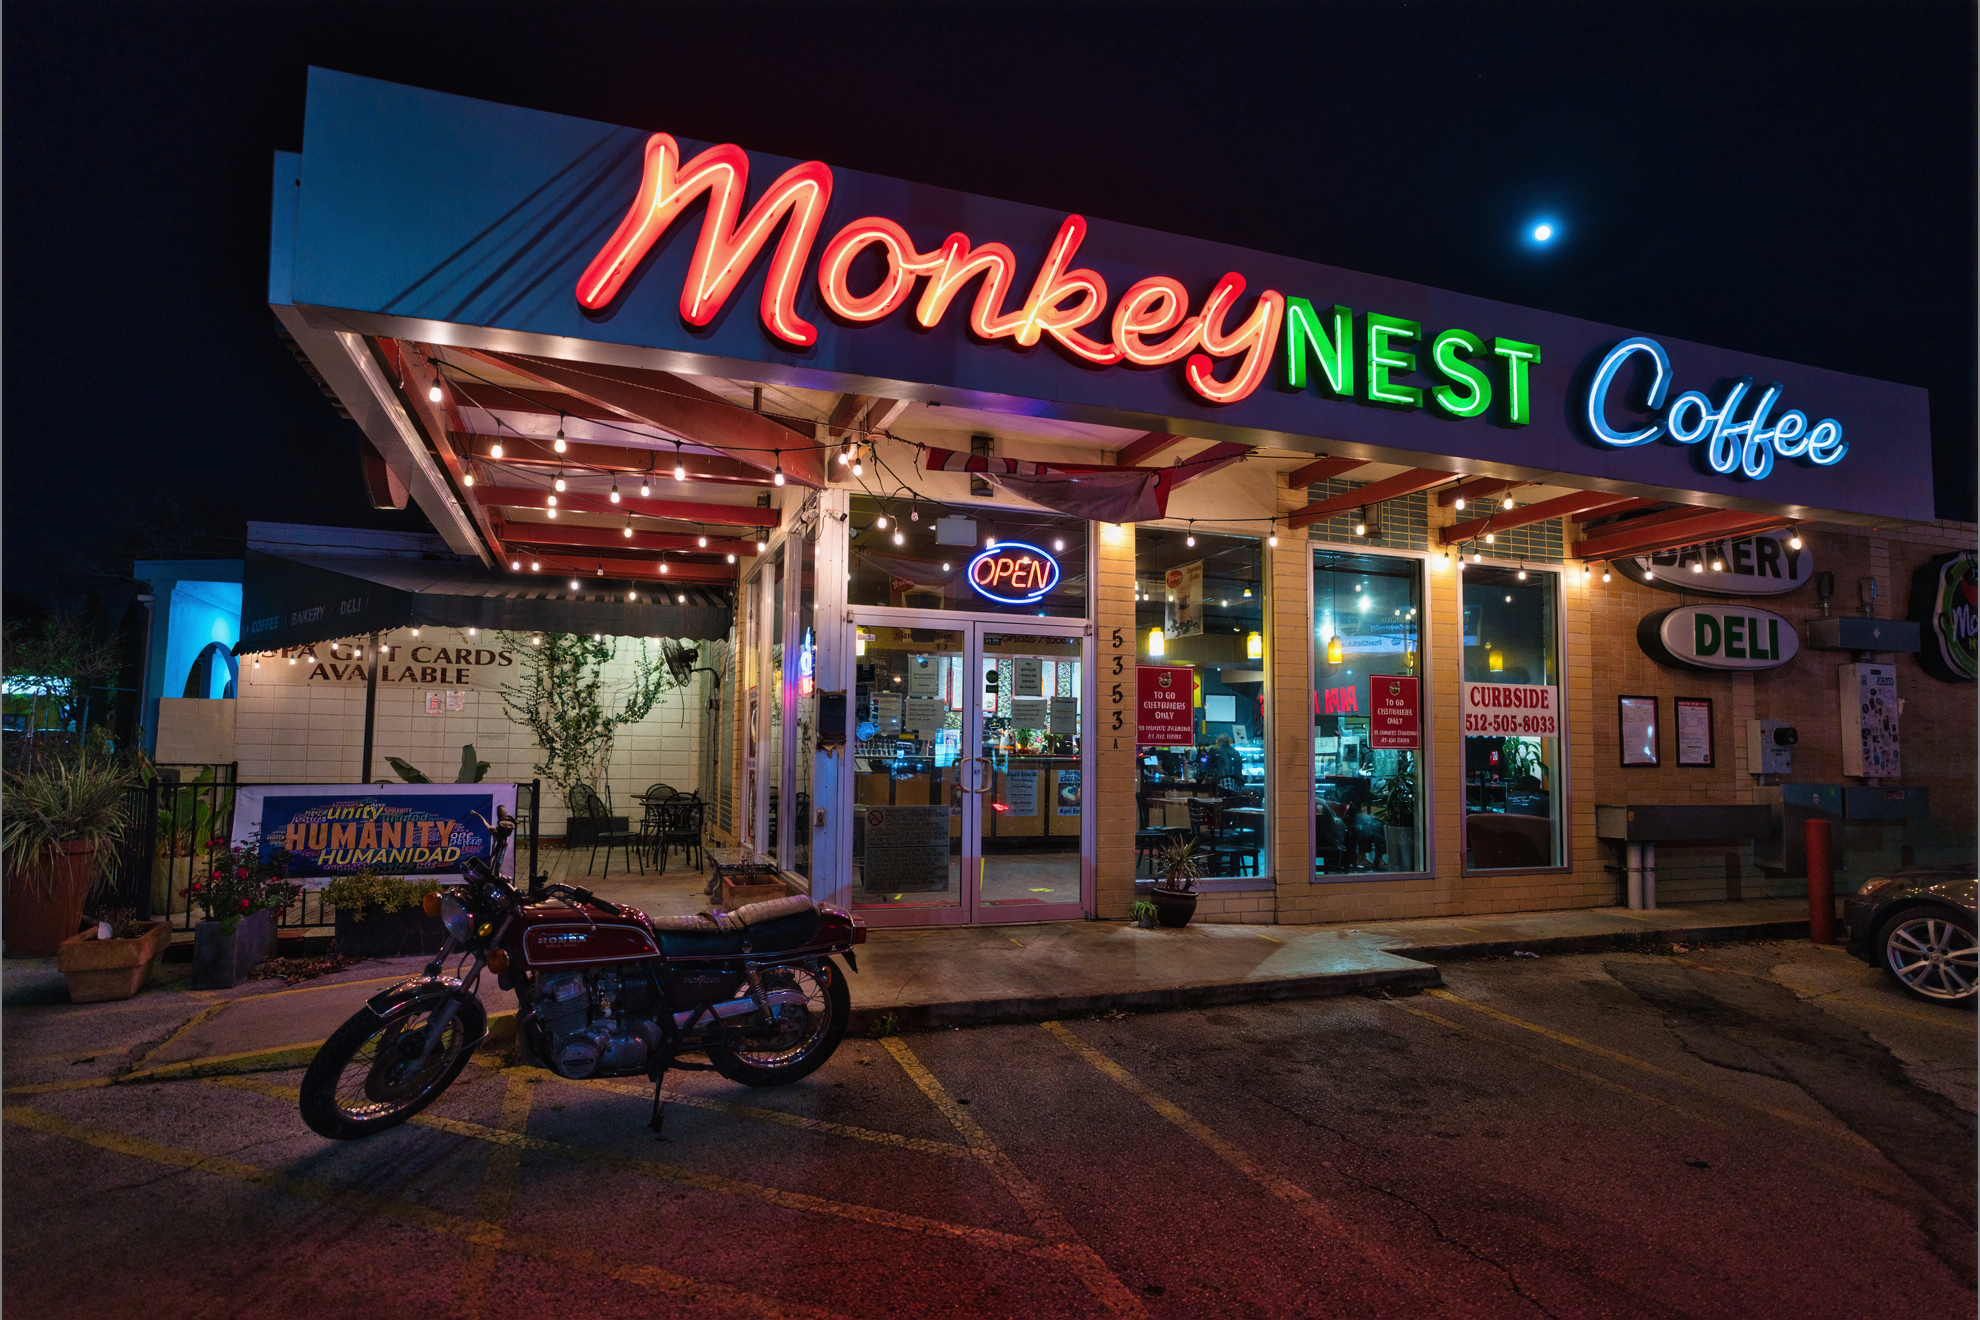

In [16]:
combined[28]['recovered']

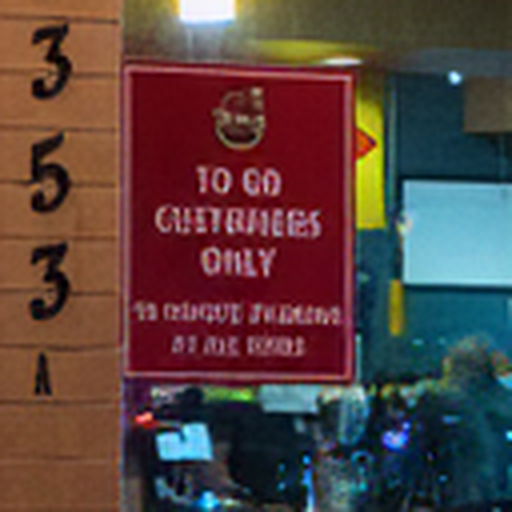

In [43]:
crop = combined[28]['recovered'].crop((1105,650,1105+128,650+128))
crop.resize((512,512),resample=PIL.Image.Resampling.LANCZOS)

Metrics for this specific image

In [44]:
for metric in metrics:
    print(f"{metric}: {combined[28][metric]}")

encode_time: 0.008236885070800781
decode_time: 0.00664067268371582
bpp: 1.0
PSNR: 21.965559005737305
MSSIM: 0.8863414525985718
LPIPS_dB: 8.143260228007428
DISTS_dB: 13.850765841361014
cpu_encode_time: 14.67607069015503
cpu_decode_time: 26.705257654190063
